**Coding challenge:** Which products will be successful?

---

**Task Summary** A fashion e-commerce company is planning its collections for the upcoming year. Therefore the company put together many potential products as candidates and now would like to estimate which products would be successful (top) or not (flop). To do so, you are provided with data of the past years’ top and flop products. This will allow you to create a small machine learning application (without an UI).

Columns:
* item_no: Internal identifier for a past product or a product candidate for
  the future.
* category: Category of the product.
* main_promotion: Main promotion that would be / was used to promote the product.
* color: The main color of the product.
* stars: Stars of reviews from a comparable product of a competitor (from 0 = very negative reviews to 5 = very positive reviews).
* success_indicator: Indicator whether a product was successful (top) or not (flop) in the past. Only given for the historic data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/DSW Test/historic.csv")
test = pd.read_csv("/content/drive/MyDrive/DSW Test/prediction_input.csv")
train.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [ ]:
test.head()

,item_no,category,main_promotion,color,stars
0,405901,Sweatshirt,Catalog,Blue,3.1
1,644275,Polo-Shirt,Frontpage_Header,Yellow,2.6
2,533070,Tunic,Catalog,Green,2.7
3,829436,Polo-Shirt,Catalog,Yellow,2.6
4,801722,Tunic,Catalog,Yellow,4.9


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [ ]:
#Class Label Distribution
train['success_indicator'].value_counts()

top     5185
flop    2815
Name: success_indicator, dtype: int64

In [ ]:
def countplot(category, title= True, annot= True):
  ax =sns.countplot(train[category])
  count= 0.00
  if annot:
    for i in ax.patches:
      plt.text(count, i.get_height(),str((i.get_height())),fontsize = 10, fontweight ='bold',color ='blue')
      count+=1
  if title:
    plt.title(str(category)+" Distribution")
  plt.xticks(rotation= 30)
  plt.show()

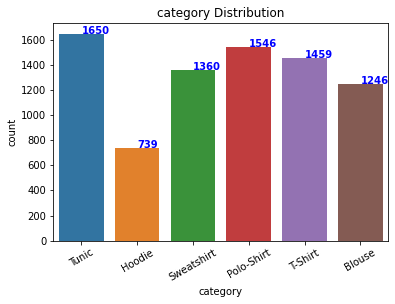

In [ ]:
# Category types
countplot('category', True, True)

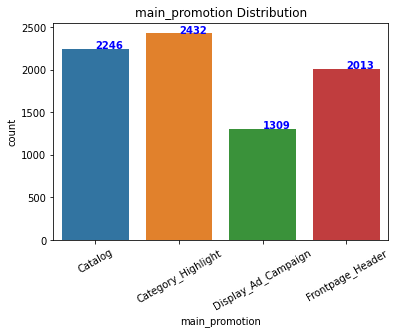

In [ ]:
countplot('main_promotion', True, True)

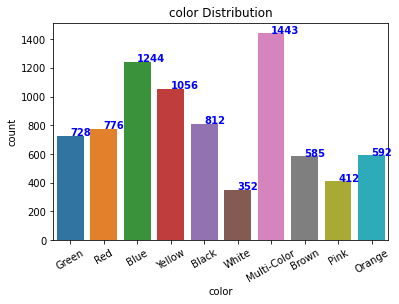

In [ ]:
countplot('color', True, True)

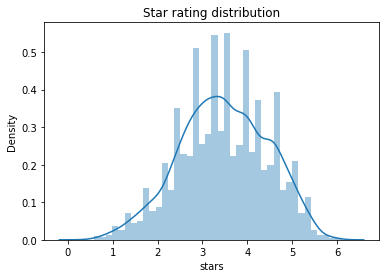

In [ ]:
sns.distplot(train['stars'])
plt.title('Star rating distribution')
plt.show()

 In the above plot, star rating distribution is nearly normal distributed.

In [ ]:
#average rating for each product category
(train.groupby('category')['stars'].mean())

category
Blouse        3.831059
Hoodie        3.401218
Polo-Shirt    3.186805
Sweatshirt    3.286176
T-Shirt       3.763674
Tunic         3.400242
Name: stars, dtype: float64

IN the above analysis , we can see that the average rating is almost same in all the categories. 

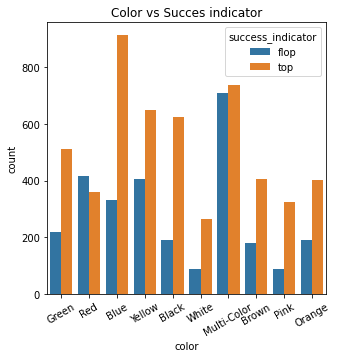

In [ ]:
## top flop with color
plt.figure(figsize=(5,5))
sns.countplot(x=train['color'], hue= train['success_indicator'])
plt.title("Color vs Succes indicator")
plt.xticks(rotation=30)
plt.show()

In [ ]:
# Top demanded colorrs in different categories
import scipy
(train.groupby('category')['color'].aggregate(scipy.stats.mode))

category
Blouse               ([Blue], [354])
Hoodie             ([Yellow], [130])
Polo-Shirt         ([Yellow], [345])
Sweatshirt         ([Orange], [248])
T-Shirt       ([Multi-Color], [388])
Tunic         ([Multi-Color], [413])
Name: color, dtype: object

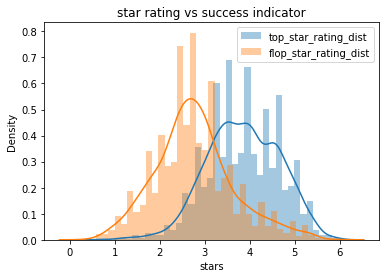

In [ ]:
sns.distplot(train[train['success_indicator']=='top']['stars'], label= 'top_star_rating_dist')
sns.distplot(train[train['success_indicator']=='flop']['stars'], label= 'flop_star_rating_dist')
plt.title("star rating vs success indicator")
plt.legend()
plt.show()


In the above plot, we can see that the distributions of stars for top and flop labels are overlapping, we can create a feature of overlap.

In [ ]:
train.groupby('main_promotion')['stars'].mean()

main_promotion
Catalog                3.289537
Category_Highlight     3.374877
Display_Ad_Campaign    3.963636
Frontpage_Header       3.477496
Name: stars, dtype: float64

In [ ]:
# Ranking categories acc to color most chosen,
ranks_dict = [{i:n%10 + 1} for n,i in enumerate(train.groupby('category')['color'].value_counts().keys())]
(ranks_dict)

[{('Blouse', 'Blue'): 1},
 {('Blouse', 'Multi-Color'): 2},
 {('Blouse', 'Black'): 3},
 {('Blouse', 'Red'): 4},
 {('Blouse', 'Yellow'): 5},
 {('Blouse', 'Brown'): 6},
 {('Blouse', 'White'): 7},
 {('Blouse', 'Green'): 8},
 {('Blouse', 'Orange'): 9},
 {('Blouse', 'Pink'): 10},
 {('Hoodie', 'Yellow'): 1},
 {('Hoodie', 'Orange'): 2},
 {('Hoodie', 'White'): 3},
 {('Hoodie', 'Green'): 4},
 {('Hoodie', 'Pink'): 5},
 {('Hoodie', 'Blue'): 6},
 {('Hoodie', 'Multi-Color'): 7},
 {('Hoodie', 'Brown'): 8},
 {('Hoodie', 'Red'): 9},
 {('Hoodie', 'Black'): 10},
 {('Polo-Shirt', 'Yellow'): 1},
 {('Polo-Shirt', 'Multi-Color'): 2},
 {('Polo-Shirt', 'Brown'): 3},
 {('Polo-Shirt', 'Blue'): 4},
 {('Polo-Shirt', 'Pink'): 5},
 {('Polo-Shirt', 'Orange'): 6},
 {('Polo-Shirt', 'Green'): 7},
 {('Polo-Shirt', 'White'): 8},
 {('Polo-Shirt', 'Red'): 9},
 {('Polo-Shirt', 'Black'): 10},
 {('Sweatshirt', 'Orange'): 1},
 {('Sweatshirt', 'Blue'): 2},
 {('Sweatshirt', 'Red'): 3},
 {('Sweatshirt', 'Multi-Color'): 4},
 {('Swe

In [ ]:

#train_test_split (80%train, 20% CV)
x_train, x_cv, y_train, y_cv = train_test_split(train.drop(['item_no','success_indicator'], axis=1), train['success_indicator'], test_size= 0.2, shuffle= train['success_indicator'], random_state=42)
print("Training Data Shape ", x_train.shape, y_train.shape)
print("CV Data Shape ", x_cv.shape, y_cv.shape)

## testing Data
x_test = test.drop(['item_no'], axis=1)
print("Testing Data Shape ", x_test.shape )

Training Data Shape  (6400, 4) (6400,)
CV Data Shape  (1600, 4) (1600,)
Testing Data Shape  (2000, 4)


## Feature Engineering

In [ ]:
## Adding more features to train and test data

train_FE = train.copy()
test_FE = test.copy()

ranking_dict = {}
for i in range(len(ranks_dict)):
  ranking_dict[['_'.join(i) for i in ranks_dict[i].keys()][0]] = list(ranks_dict[i].values())[0]

train_FE['color_category_rank'] = train_FE['category']+ '_' + train_FE['color']
test_FE['color_category_rank'] = test_FE['category'] + '_' + test_FE['color']

train_FE['color_category_rank'] = train_FE['color_category_rank'].apply(lambda x:ranking_dict.get(x))
test_FE['color_category_rank'] = test_FE['color_category_rank'].apply(lambda x:ranking_dict.get(x))
train_FE.head()

,item_no,category,main_promotion,color,stars,success_indicator,color_category_rank
0,739157,Tunic,Catalog,Green,3.1,flop,2
1,591846,Hoodie,Category_Highlight,Red,1.5,flop,9
2,337574,Sweatshirt,Catalog,Red,4.4,top,3
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop,4
4,812151,Hoodie,Category_Highlight,Green,4.1,top,4
